In [2]:
import aerospike
import json
from aerospike import predicates
config = {
    'hosts': [
        ( 'bidapi-g-use1d-as-p-c8-1.srv.media.net', 3000 )
    ],
    'policies': {
        'timeout': 10000 # milliseconds
    }
}
client = aerospike.client(config).connect()

In [ ]:
import json

results = {}
site_names = {}

def collect_results(record):
    # Assuming the JSON string is in the third element of the tuple
    try:
        json_data = json.loads(record[2][''])
        for item in json_data:
            sd_value = item.get('sd')
            sn_value = item.get('sn')
            print(f"SD: {sd_value}, SN: {sn_value}")
            if sd_value:
                results[sd_value] = results.get(sd_value, 0) + 1
            if sn_value:
                site_names[sn_value] = site_names.get(sn_value, 0) + 1
    except (KeyError, json.JSONDecodeError) as e:
        print(f"Error processing record: {e}")

try:
    query = client.query("replicator", "RPM_CUSTOMER_STOP_LOSS")
    query.foreach(collect_results)
    # sd_output = json.dumps(results)
    # site_output = json.dumps(site_names)
    # print(sd_output)
    # print(site_output)
except Exception as e:
    print(f"Error: {e}")

SD: 202411271939, SN: 322337178
SD: 202312141330, SN: schengenvisainfo.com`!`!`256851311`!`!`M
SD: 202411271939, SN: womansday.com`!`!`377614659
SD: 202411271939, SN: 871145814
SD: 202411271939, SN: 854255450
SD: 202411271930, SN: mapquest.com`!`!`162462012
SD: 202411271939, SN: 882633542
SD: 202411271939, SN: 568655834
SD: 202411271900, SN: twentytwowords.com`!`!`838235293`!`!`M
SD: 202410172030, SN: paraglidingstory.tech`!`!`572786712
SD: 202411271930, SN: 827588724
SD: 202411271939, SN: announcements.buxtonadvertiser.co.uk`!`!`229685446`!`!`M
SD: 202409142100, SN: foodgroove.de`!`!`233574445`!`!`E
SD: 202411271939, SN: mydramalist.com`!`!`744485572
SD: 202410141730, SN: migrationseeker.com`!`!`237786346
SD: 202403140930, SN: jobefi.com`!`!`262087715`!`!`C
SD: 202411271900, SN: 777686456
SD: 202411271939, SN: news.knowledgeforcars.com`!`!`661798176
SD: 202411271939, SN: 574178975`!`!`R
SD: 202411271939, SN: wellplated.com`!`!`555691076
SD: 202411271939, SN: 520342778
SD: 202411271939

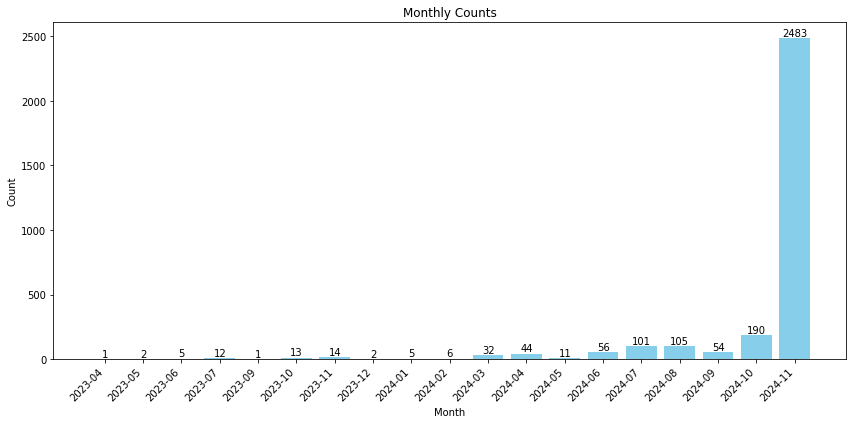

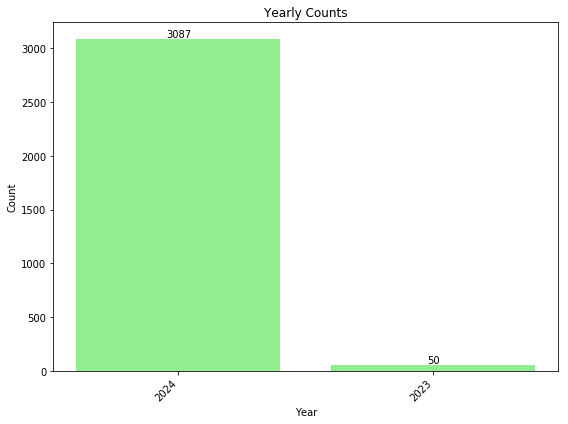

In [40]:
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict
# Initialize dictionaries to hold monthly and yearly counts
monthly_counts = defaultdict(int)
yearly_counts = defaultdict(int)

# Process each date and aggregate counts
for date_str, count in results.items():
    date = datetime.strptime(date_str, "%Y%m%d%H%M")
    year_month = date.strftime("%Y-%m")
    year = date.strftime("%Y")

    monthly_counts[year_month] += count
    yearly_counts[year] += count

# Sort months
sorted_months = dict(sorted(monthly_counts.items()))
sorted_dates = list(sorted_months.keys())

# Plotting Monthly Counts
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_months.keys(), sorted_months.values(), color='skyblue')
plt.title("Monthly Counts")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Plotting Yearly Counts
plt.figure(figsize=(8, 6))
bars = plt.bar(yearly_counts.keys(), yearly_counts.values(), color='lightgreen')
plt.title("Yearly Counts")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10)

plt.tight_layout()
plt.show()